#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

March 4, 2016

## Next Steps of Our Project

Goals:
* Explore more aspects of our data
* Create clearer visualizations

##### Imports

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


We want to explore more features of our data to learn more about the axes of diversity we were initially interested in.  

We also want to modify the presentation of our visualizations from the previous notebook to make them clearer and more impactful.

#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [2]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

In [3]:
df_subset = df[df['ALCLSACT'] < 3]


##### Helper function for showing emotional impact of sacrificing important activities for the sake of a substance.

In [4]:
def mental_health_bars_activity(df, act, emotion, substancestr, emotionstr):
    """   
    df: dataframe of interest

    act: whether respondant sacrificed important activities,(such as working, going to school, taking care of children, doing fun things such as hobbies
        and sports, and spending time with friends and family) for the sake of a given substance
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
   
    df_subset = df[df[act] < 3]
    df_subset= df_subset[df_subset[emotion] < 6]
    df_subset['BRACKET'] = df_subset[act]
    df_subset['EMOBRACKET'] = df_subset[emotion]
    
    df_subset.loc[df_subset[emotion] >= 5, 'EMOBRACKET'] = emotionstr +' Never'     
    df_subset.loc[df_subset[emotion] < 5, 'EMOBRACKET'] = emotionstr + ' Some or Little'
    df_subset.loc[df_subset[emotion] < 3, 'EMOBRACKET'] = emotionstr + ' Most or All'
    
   
    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped['EMOBRACKET'].value_counts(normalize=True)
    display(bracket_counts)
        
    bracket_data = [{'BRACKET': br, 'EMOBRACKET': em, 'percentage': percentage*100}
                    for (br, em), percentage in dict(bracket_counts).items()
                   ]
    
    plotting_df = pd.DataFrame(bracket_data)
    display(plotting_df)
    
    
    p, ax = plt.subplots()
    #_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    hue_order_list = [emotionstr + ' Most or All' , emotionstr + ' Some or Little', emotionstr + ' Never']
    p = sns.barplot(x="BRACKET", y="percentage", hue="EMOBRACKET", hue_order=hue_order_list, data=plotting_df)
    ax.set_xticklabels(['yes', 'no'])
    xlabel = 'Gave up or spent less time on important activities'
    plt.xlabel(xlabel)
    plt.ylabel('Percentage of Respondents in Frequency Bracket')
    title =  'Sacrificed Important Activities due to ' + substancestr
    plt.title(title)
    plt.show()
    
    return


##### Helper function to show how many people who have used a substance  sacrifce important activites

In [5]:
def sacrificed_activities(df, act,  substancestr,  used_ever):
    """
    Shows plot of how many respondants who have used the substance make these sacrifices for the substance.
    df: dataframe of interest
    act: whether respondant sacrificed important activities,(such as working, going to school, taking care of children, doing fun things such as hobbies
        and sports, and spending time with friends and family) for the sake of a given substance
    emotion: mental health aspect of interest
    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """     
   
    df_subset = df[df[act]< 3]
    df_subset['BRACKET'] = df_subset[act]    
    df_substance_subset = df_subset[df_subset[used_ever] == 1]
    yvals = df_substance_subset['BRACKET'].value_counts()
    sns.pointplot(x=[0,1], y=yvals)
    point_plot_title = '# Of Respondants Reporting Sacrificing Important Activites For ' + substancestr 
    plt.title(point_plot_title)
    return

def sacrificed_activities30(df, act, substancestr, isuser):
    
    df_subset = df[df[act]< 3]
    df_subset['BRACKET'] = df_subset[act] 
    if isuser == 'HER30USE':        
        df_substance_user_subset = df_subset[df_subset[isuser] < 30]
    else:
        df_substance_user_subset = df_subset[df_subset[isuser] < 6]
    yesdf = df_substance_user_subset[df_substance_user_subset['BRACKET']==1]
    yes = yesdf['BRACKET'].count()
    nodf = df_substance_user_subset[df_substance_user_subset['BRACKET']==2]
    no = nodf['BRACKET'].count()
    print 'yes and no responses'
    print yes
    print no
    yes = float(yes)
    no = float(no)
    yesperc = (yes)/(yes+no)
    noperc = (no)/(yes+no)
    sns.pointplot(x=[0,1], y=[noperc, yesperc])
    point_plot_title = '% Of Past Month Users Reporting Sacrificing Important Activites For ' + substancestr 
    plt.title(point_plot_title)
    return


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


yes and no responses
1505
25363


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.485670
         Hopelessness Never             0.379551
         Hopelessness Most or All       0.134779
2        Hopelessness Never             0.663388
         Hopelessness Some or Little    0.294421
         Hopelessness Most or All       0.042191
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,13.477924
1,2,Hopelessness Most or All,4.219133
2,1,Hopelessness Never,37.955074
3,2,Hopelessness Some or Little,29.442113
4,1,Hopelessness Some or Little,48.567002
5,2,Hopelessness Never,66.338755


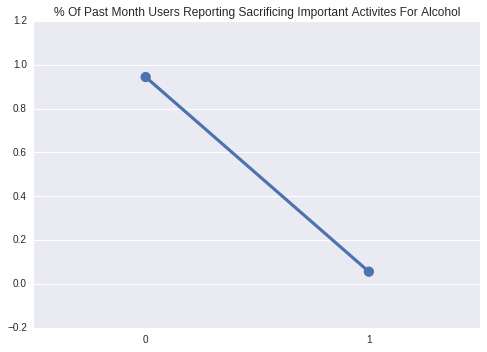

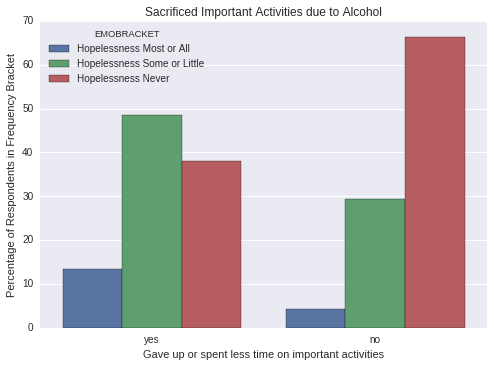

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.653014
         Nervousness Never             0.175425
         Nervousness Most or All       0.171561
2        Nervousness Some or Little    0.596641
         Nervousness Never             0.344968
         Nervousness Most or All       0.058391
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,34.496785
1,2,Nervousness Some or Little,59.664086
2,1,Nervousness Most or All,17.156105
3,1,Nervousness Some or Little,65.301391
4,1,Nervousness Never,17.542504
5,2,Nervousness Most or All,5.839129


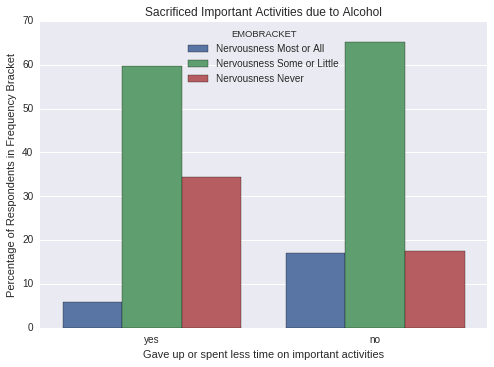

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.585008
         Restlessness Never             0.225657
         Restlessness Most or All       0.189335
2        Restlessness Some or Little    0.491190
         Restlessness Never             0.440607
         Restlessness Most or All       0.068203
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,58.500773
1,2,Restlessness Never,44.060683
2,1,Restlessness Most or All,18.933539
3,2,Restlessness Most or All,6.820268
4,1,Restlessness Never,22.565688
5,2,Restlessness Some or Little,49.119049


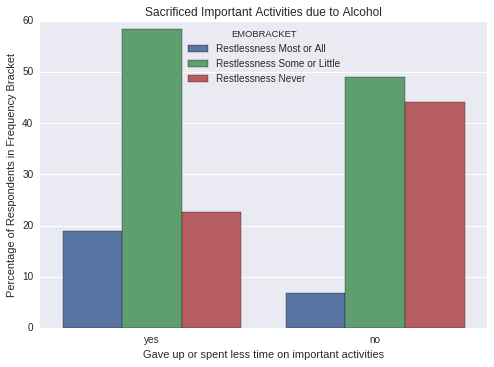

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.490347
         Depression Never             0.378378
         Depression Most or All       0.131274
2        Depression Never             0.678192
         Depression Some or Little    0.282161
         Depression Most or All       0.039647
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,37.837838
1,2,Depression Most or All,3.964681
2,1,Depression Some or Little,49.034749
3,2,Depression Never,67.819207
4,2,Depression Some or Little,28.216112
5,1,Depression Most or All,13.127413


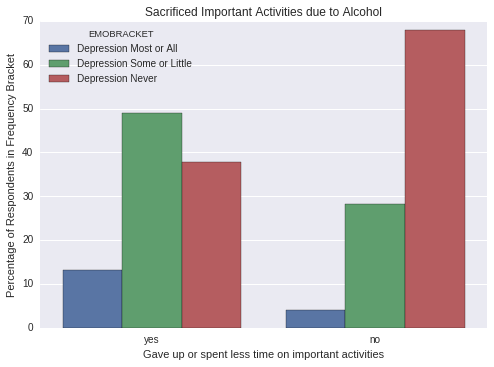

In [6]:
#sacrificed_activities(df, 'ALCLSACT',  'Alcohol', 'ALCEVER')
sacrificed_activities30(df, 'ALCLSACT',  'Alcohol', 'ALCMDAYS')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTHOP30', 'Alcohol', 'Hopelessness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTNRV30', 'Alcohol', 'Nervousness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTRST30', 'Alcohol', 'Restlessness')
mental_health_bars_activity(df, 'ALCLSACT', 'DSTCHR30', 'Alcohol', 'Depression')

yes and no responses
899
6849


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.510708
         Hopelessness Never             0.332784
         Hopelessness Most or All       0.156507
2        Hopelessness Never             0.556651
         Hopelessness Some or Little    0.366326
         Hopelessness Most or All       0.077023
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,15.650741
1,2,Hopelessness Most or All,7.702326
2,1,Hopelessness Never,33.278418
3,2,Hopelessness Some or Little,36.632558
4,1,Hopelessness Some or Little,51.070840
5,2,Hopelessness Never,55.665116


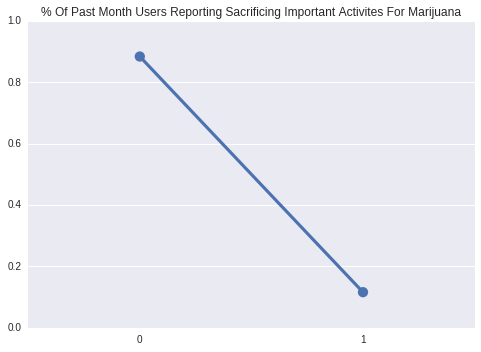

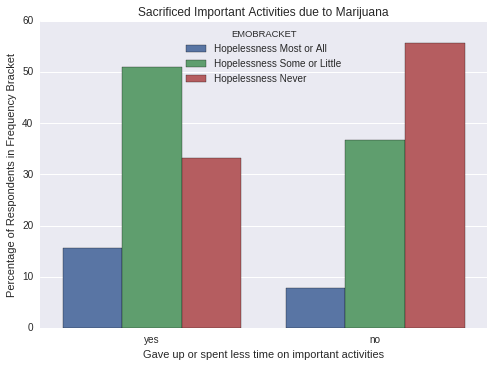

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.652389
         Nervousness Most or All       0.176277
         Nervousness Never             0.171334
2        Nervousness Some or Little    0.601823
         Nervousness Never             0.303515
         Nervousness Most or All       0.094662
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,30.351497
1,2,Nervousness Some or Little,60.182258
2,1,Nervousness Most or All,17.627677
3,1,Nervousness Some or Little,65.238880
4,1,Nervousness Never,17.133443
5,2,Nervousness Most or All,9.466245


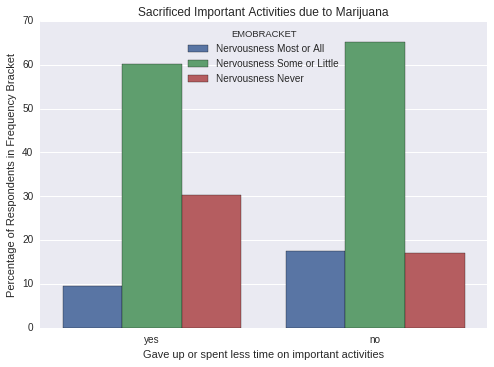

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.564145
         Restlessness Never             0.220395
         Restlessness Most or All       0.215461
2        Restlessness Some or Little    0.522402
         Restlessness Never             0.359918
         Restlessness Most or All       0.117680
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,56.414474
1,2,Restlessness Never,35.991820
2,1,Restlessness Most or All,21.546053
3,2,Restlessness Most or All,11.767987
4,1,Restlessness Never,22.039474
5,2,Restlessness Some or Little,52.240193


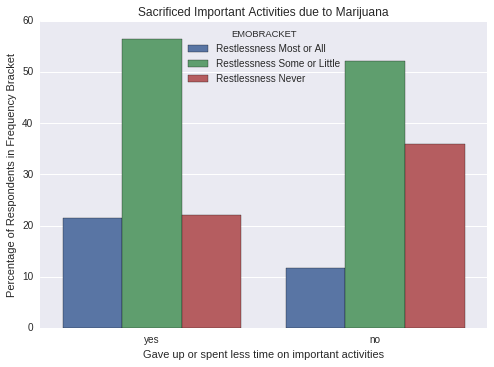

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.480263
         Depression Never             0.365132
         Depression Most or All       0.154605
2        Depression Never             0.559502
         Depression Some or Little    0.366307
         Depression Most or All       0.074191
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,36.513158
1,2,Depression Most or All,7.419115
2,1,Depression Some or Little,48.026316
3,2,Depression Never,55.950167
4,2,Depression Some or Little,36.630718
5,1,Depression Most or All,15.460526


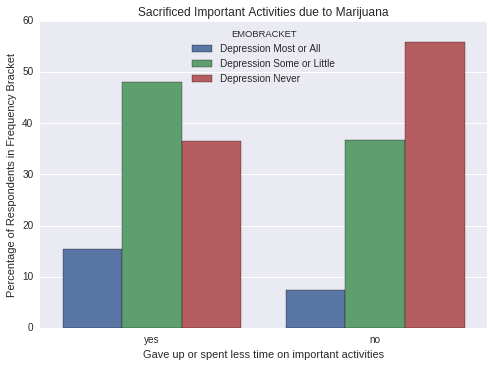

In [7]:
sacrificed_activities30(df, 'MRJLSACT', 'Marijuana', 'MRJMDAYS' )
mental_health_bars_activity(df, 'MRJLSACT', 'DSTHOP30', 'Marijuana', 'Hopelessness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTNRV30', 'Marijuana', 'Nervousness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTRST30', 'Marijuana', 'Restlessness')
mental_health_bars_activity(df, 'MRJLSACT', 'DSTCHR30', 'Marijuana', 'Depression')


yes and no responses
137
1100


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.476190
         Hopelessness Most or All       0.269841
         Hopelessness Never             0.253968
2        Hopelessness Never             0.500000
         Hopelessness Some or Little    0.395161
         Hopelessness Most or All       0.104839
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,26.984127
1,2,Hopelessness Most or All,10.483871
2,1,Hopelessness Never,25.396825
3,2,Hopelessness Some or Little,39.516129
4,1,Hopelessness Some or Little,47.619048
5,2,Hopelessness Never,50.000000


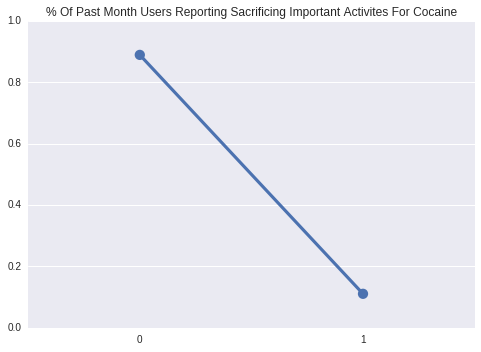

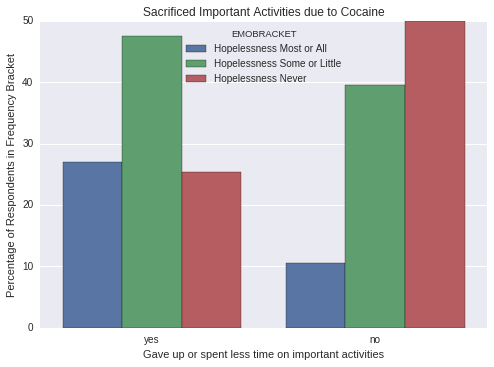

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.507937
         Nervousness Most or All       0.293651
         Nervousness Never             0.198413
2        Nervousness Some or Little    0.608871
         Nervousness Never             0.263105
         Nervousness Most or All       0.128024
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,26.310484
1,2,Nervousness Some or Little,60.887097
2,1,Nervousness Most or All,29.365079
3,1,Nervousness Some or Little,50.793651
4,1,Nervousness Never,19.841270
5,2,Nervousness Most or All,12.802419


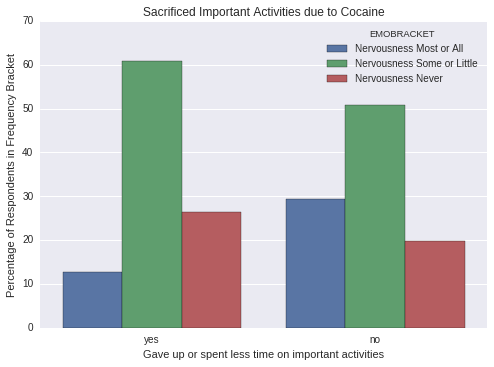

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.539683
         Restlessness Most or All       0.293651
         Restlessness Never             0.166667
2        Restlessness Some or Little    0.570997
         Restlessness Never             0.289023
         Restlessness Most or All       0.139980
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,53.968254
1,2,Restlessness Never,28.902316
2,1,Restlessness Most or All,29.365079
3,2,Restlessness Most or All,13.997986
4,1,Restlessness Never,16.666667
5,2,Restlessness Some or Little,57.099698


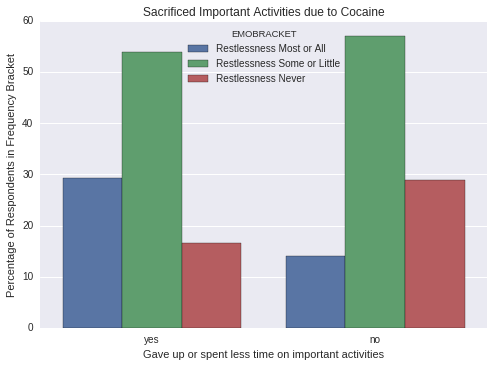

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.531746
         Depression Most or All       0.253968
         Depression Never             0.214286
2        Depression Never             0.499496
         Depression Some or Little    0.416918
         Depression Most or All       0.083585
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,21.428571
1,2,Depression Most or All,8.358510
2,1,Depression Some or Little,53.174603
3,2,Depression Never,49.949648
4,2,Depression Some or Little,41.691843
5,1,Depression Most or All,25.396825


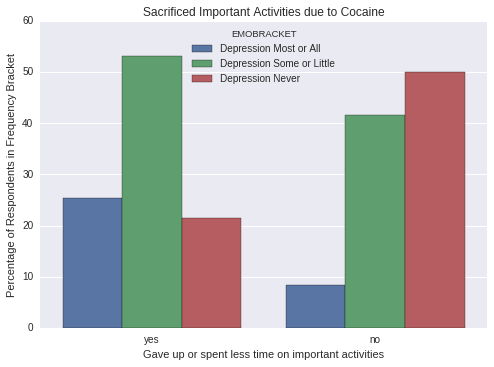

In [8]:
sacrificed_activities30(df, 'COCLSACT', 'Cocaine', 'COCMDAYS' )
mental_health_bars_activity(df, 'COCLSACT', 'DSTHOP30', 'Cocaine', 'Hopelessness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTNRV30', 'Cocaine', 'Nervousness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTRST30', 'Cocaine', 'Restlessness')
mental_health_bars_activity(df, 'COCLSACT', 'DSTCHR30', 'Cocaine', 'Depression')

yes and no responses
37
31


/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.476190
         Hopelessness Most or All       0.304762
         Hopelessness Never             0.219048
2        Hopelessness Some or Little    0.504950
         Hopelessness Never             0.336634
         Hopelessness Most or All       0.158416
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,30.476190
1,2,Hopelessness Most or All,15.841584
2,1,Hopelessness Never,21.904762
3,2,Hopelessness Some or Little,50.495050
4,1,Hopelessness Some or Little,47.619048
5,2,Hopelessness Never,33.663366


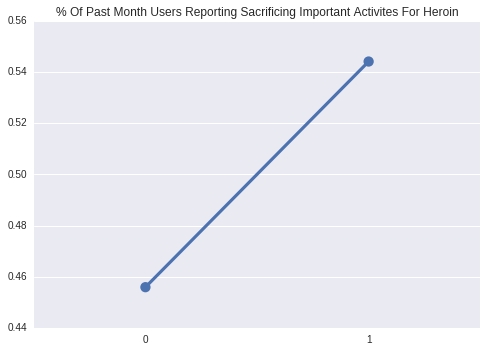

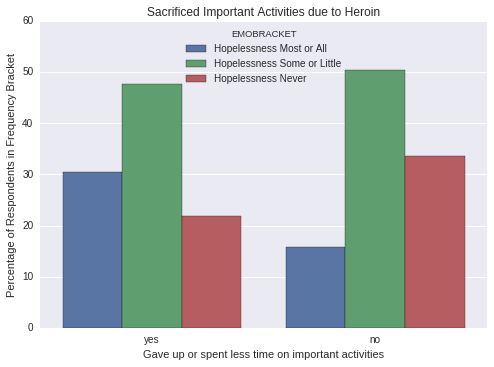

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.638095
         Nervousness Most or All       0.238095
         Nervousness Never             0.123810
2        Nervousness Some or Little    0.623762
         Nervousness Never             0.198020
         Nervousness Most or All       0.178218
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,19.801980
1,2,Nervousness Some or Little,62.376238
2,1,Nervousness Most or All,23.809524
3,1,Nervousness Some or Little,63.809524
4,1,Nervousness Never,12.380952
5,2,Nervousness Most or All,17.821782


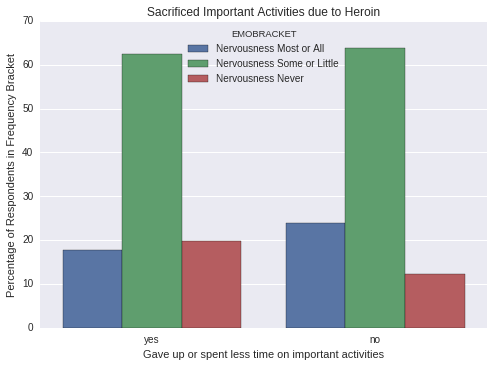

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.580952
         Restlessness Most or All       0.295238
         Restlessness Never             0.123810
2        Restlessness Some or Little    0.534653
         Restlessness Most or All       0.257426
         Restlessness Never             0.207921
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,58.095238
1,2,Restlessness Never,20.792079
2,1,Restlessness Most or All,29.523810
3,2,Restlessness Most or All,25.742574
4,1,Restlessness Never,12.380952
5,2,Restlessness Some or Little,53.465347


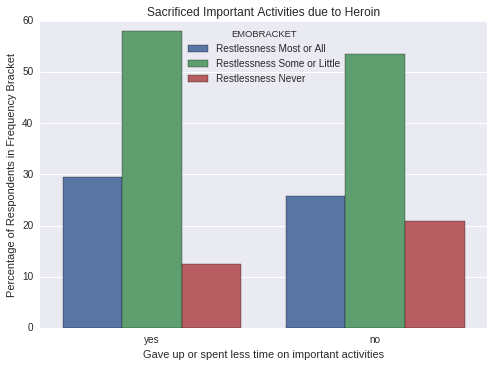

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.523810
         Depression Most or All       0.247619
         Depression Never             0.228571
2        Depression Some or Little    0.485149
         Depression Never             0.356436
         Depression Most or All       0.158416
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,22.857143
1,2,Depression Most or All,15.841584
2,1,Depression Some or Little,52.380952
3,2,Depression Never,35.643564
4,2,Depression Some or Little,48.514851
5,1,Depression Most or All,24.761905


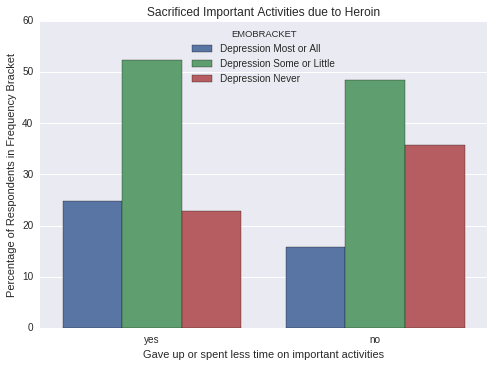

yes and no responses
81
1841


BRACKET  EMOBRACKET                 
1        Hopelessness Some or Little    0.416667
         Hopelessness Most or All       0.312500
         Hopelessness Never             0.270833
2        Hopelessness Never             0.488842
         Hopelessness Some or Little    0.412831
         Hopelessness Most or All       0.098326
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Hopelessness Most or All,31.250000
1,2,Hopelessness Most or All,9.832636
2,1,Hopelessness Never,27.083333
3,2,Hopelessness Some or Little,41.283124
4,1,Hopelessness Some or Little,41.666667
5,2,Hopelessness Never,48.884240


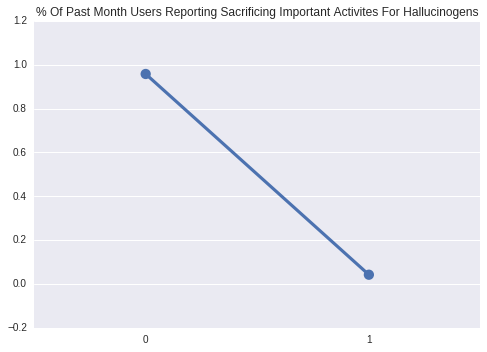

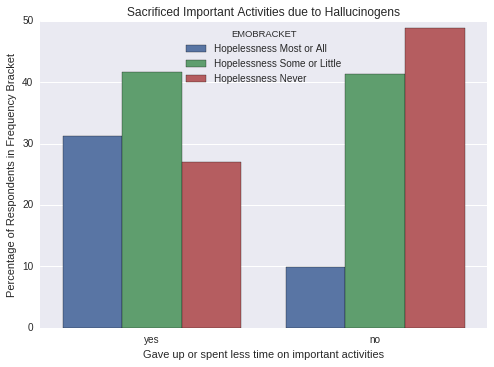

BRACKET  EMOBRACKET                
1        Nervousness Some or Little    0.604167
         Nervousness Most or All       0.312500
         Nervousness Never             0.083333
2        Nervousness Some or Little    0.653873
         Nervousness Never             0.230286
         Nervousness Most or All       0.115841
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,2,Nervousness Never,23.028611
1,2,Nervousness Some or Little,65.387299
2,1,Nervousness Most or All,31.250000
3,1,Nervousness Some or Little,60.416667
4,1,Nervousness Never,8.333333
5,2,Nervousness Most or All,11.584089


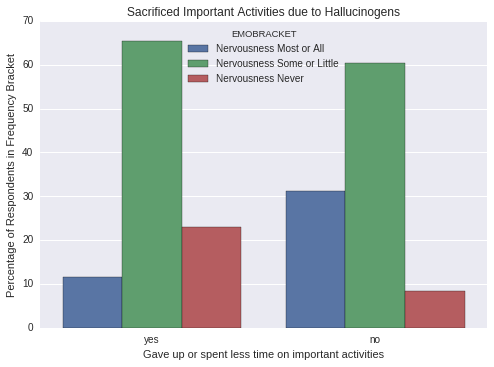

BRACKET  EMOBRACKET                 
1        Restlessness Some or Little    0.416667
         Restlessness Most or All       0.375000
         Restlessness Never             0.208333
2        Restlessness Some or Little    0.574216
         Restlessness Never             0.276655
         Restlessness Most or All       0.149129
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Restlessness Some or Little,41.666667
1,2,Restlessness Never,27.665505
2,1,Restlessness Most or All,37.500000
3,2,Restlessness Most or All,14.912892
4,1,Restlessness Never,20.833333
5,2,Restlessness Some or Little,57.421603


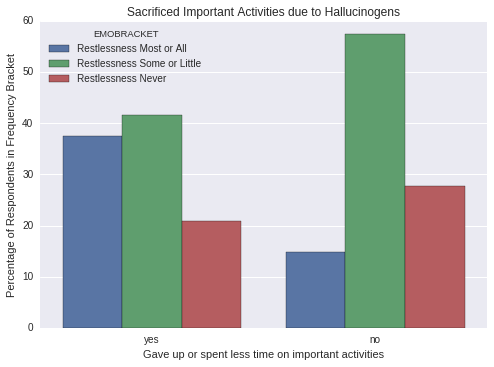

BRACKET  EMOBRACKET               
1        Depression Some or Little    0.375000
         Depression Most or All       0.354167
         Depression Never             0.270833
2        Depression Never             0.488145
         Depression Some or Little    0.421199
         Depression Most or All       0.090656
dtype: float64

,BRACKET,EMOBRACKET,percentage
0,1,Depression Never,27.083333
1,2,Depression Most or All,9.065551
2,1,Depression Some or Little,37.500000
3,2,Depression Never,48.814505
4,2,Depression Some or Little,42.119944
5,1,Depression Most or All,35.416667


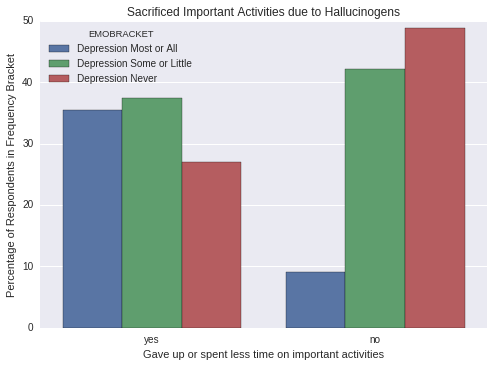

In [9]:
sacrificed_activities30(df, 'HERLSACT', 'Heroin', 'HER30USE' )
mental_health_bars_activity(df, 'HERLSACT', 'DSTHOP30', 'Heroin', 'Hopelessness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTNRV30', 'Heroin', 'Nervousness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTRST30', 'Heroin', 'Restlessness')
mental_health_bars_activity(df, 'HERLSACT', 'DSTCHR30', 'Heroin', 'Depression')


sacrificed_activities30(df, 'HALLSACT', 'Hallucinogens', 'HALMDAYS' )
mental_health_bars_activity(df, 'HALLSACT', 'DSTHOP30', 'Hallucinogens', 'Hopelessness')
mental_health_bars_activity(df, 'HALLSACT', 'DSTNRV30', 'Hallucinogens', 'Nervousness')
mental_health_bars_activity(df, 'HALLSACT', 'DSTRST30', 'Hallucinogens', 'Restlessness')
mental_health_bars_activity(df, 'HALLSACT', 'DSTCHR30', 'Hallucinogens', 'Depression')



#sacrificed_activities30(df, 'STMLSACT', 'Stimulants', 'STMMDAYS' )
#mental_health_bars_activity(df, 'STMLSACT', 'DSTHOP30', 'Stimulants', 'Hopelessness')
#mental_health_bars_activity(df, 'STMLSACT', 'DSTNRV30', 'Stimulants', 'Nervousness')
#mental_health_bars_activity(df, 'STMLSACT', 'DSTRST30', 'Stimulants', 'Restlessness')
#mental_health_bars_activity(df, 'STMLSACT', 'DSTCHR30', 'Stimulants', 'Depression')




In [33]:
def health_probs_substance(df,emoprbs, emoprbs_cnt, physprbs, physprbs_cnt, used_ever, substancestr):
    """
   
    df: dataframe of interest
    emoprbs: whether substance has caused emotional problems
    emoprbs_cnt: whether respondant continued to use substance despite emotional probs
    usedever: whether a respondant has used this substance
    for the sake of plot labelling:
    substance: human readable string of the substance
    """
    
    
    
    df_substance_subset = df[df[used_ever]==1]
    df_emotional_subset = df_substance_subset[df_substance_subset[emoprbs_cnt]< 3]
    df_physical_subset = df_substance_subset[df_substance_subset[physprbs_cnt]< 3]
    
    
    
    emo_yvals = df_emotional_subset[emoprbs_cnt].value_counts()
    emotional_harm = sum(emo_yvals)
    phys_yvals = df_physical_subset[physprbs_cnt].value_counts()
    physical_harm = sum(phys_yvals)
    print 'emotional yvals'
    print emo_yvals
    print 'physical yvals'
    print phys_yvals

    f, (ax1, ax2) = plt.subplots(2)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=4.0)
    ax1.set_title('Emotional/Mental and Physical Health Harmed Due to ' + substancestr, fontsize=14)
    ax1.set_ylabel('# of Respondants')
    
    ax2.set_title('Comparison of Emotional/Mental and Physical Health Impact from ' + substancestr, fontsize=14)
    ax2.figure.set_size_inches(10, 20)
    
    ylimval = 1.1*max(emo_yvals)
    ax1.set_ylim(0, ylimval)
    
    emotion='emotion'
    
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})
    sns.pointplot(x=['Continue Use','Stop When Problems Arise'],y=emo_yvals, title='Emotional Problems', n_boot=10, ax=ax1)
    sns.pointplot(x=['Continue Use','Stop When Problems Arise'],y=phys_yvals, color="#bb3f3f", title='Physical Problems', n_boot=10, ax=ax1)
    
    sns.barplot(x=['Harm Emotional/Mental Health', 'Harm to Physical Health'], y=[emotional_harm, physical_harm])


emotional yvals
1    1376
2     915
Name: ALCEMCTD, dtype: int64
physical yvals
2    415
1    308
Name: ALCPHCTD, dtype: int64


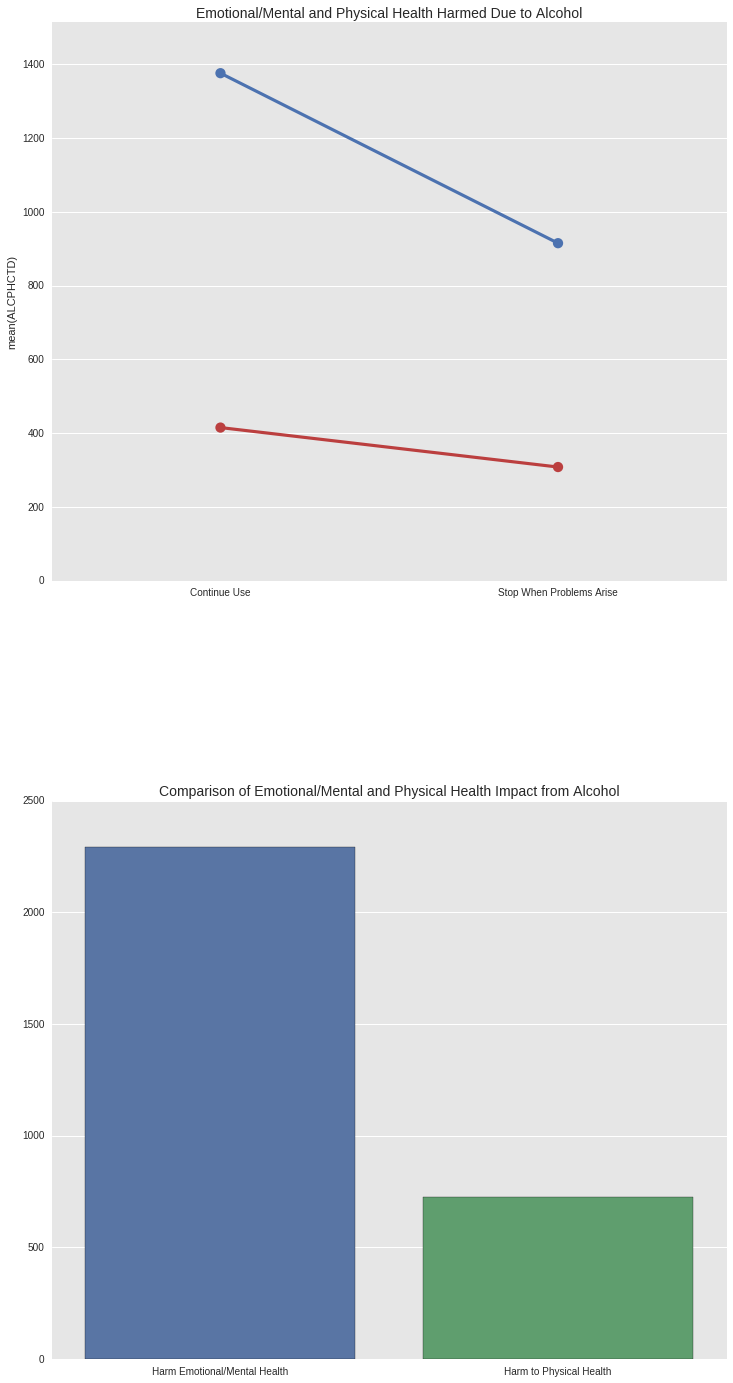

In [34]:
   
health_probs_substance(df, 'ALCEMOPB', 'ALCEMCTD', 'ALCPHLPB', 'ALCPHCTD', 'ALCEVER', 'Alcohol')
#physical_probs_substance(df, 'ALCPHLPB', 'ALCPHCTD', 'ALCEVER', 'Alcohol')


emotional yvals
1    1376
2     915
Name: ALCEMCTD, dtype: int64
physical yvals
2    415
1    308
Name: ALCPHCTD, dtype: int64


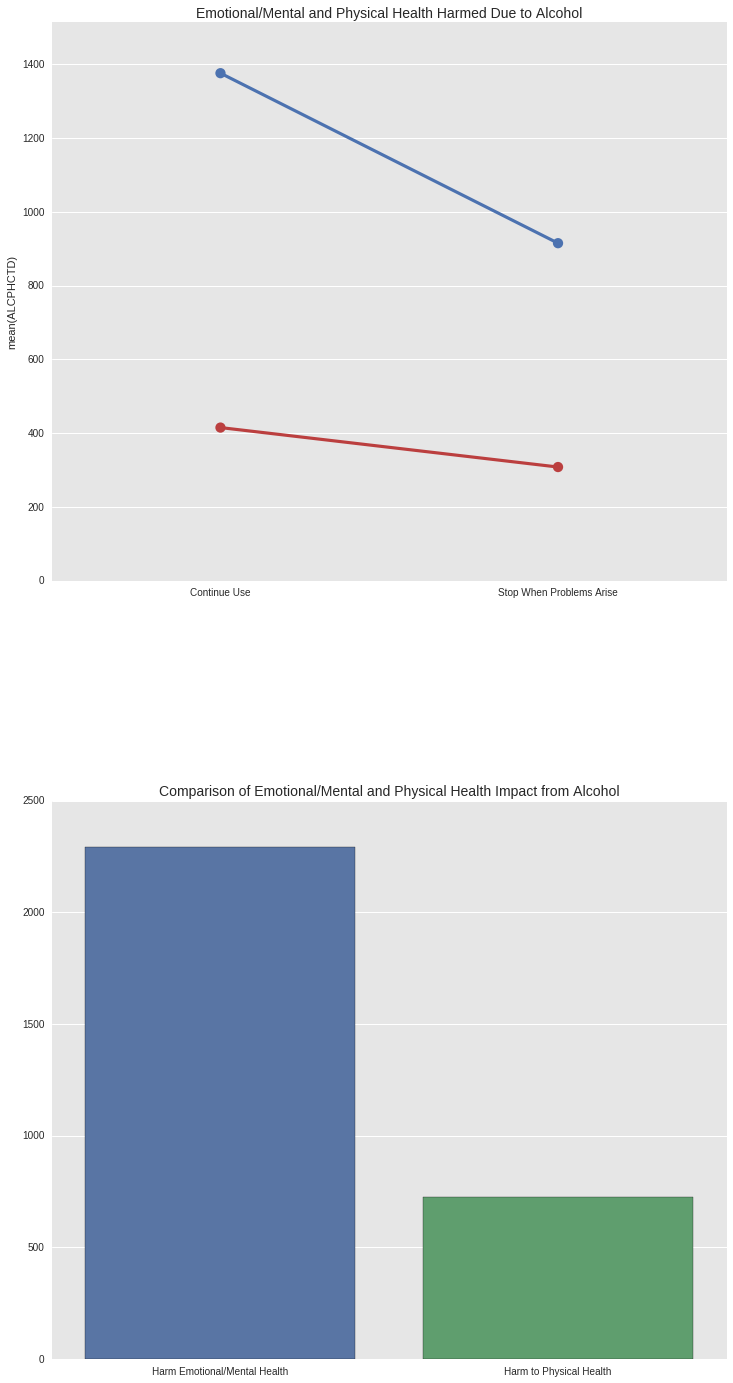

In [35]:
health_probs_substance(df, 'ALCEMOPB', 'ALCEMCTD', 'ALCPHLPB', 'ALCPHCTD', 'ALCEVER', 'Alcohol')

emotional yvals
1    493
2    286
Name: MRJEMCTD, dtype: int64
physical yvals
2    103
1     87
Name: MRJPHCTD, dtype: int64
emotional yvals
1    104
2     67
Name: COCEMCTD, dtype: int64
physical yvals
2    30
1    18
Name: COCPHCTD, dtype: int64
emotional yvals
1    95
2    20
Name: HEREMCTD, dtype: int64
physical yvals
1    8
2    7
Name: HERPHCTD, dtype: int64
emotional yvals
1    99
2    64
Name: STMEMCTD, dtype: int64
physical yvals
2    17
1     7
Name: STMPHCTD, dtype: int64
emotional yvals
1    17
2    15
Name: SEDEMCTD, dtype: int64
physical yvals
2    6
1    1
Name: SEDPHCTD, dtype: int64


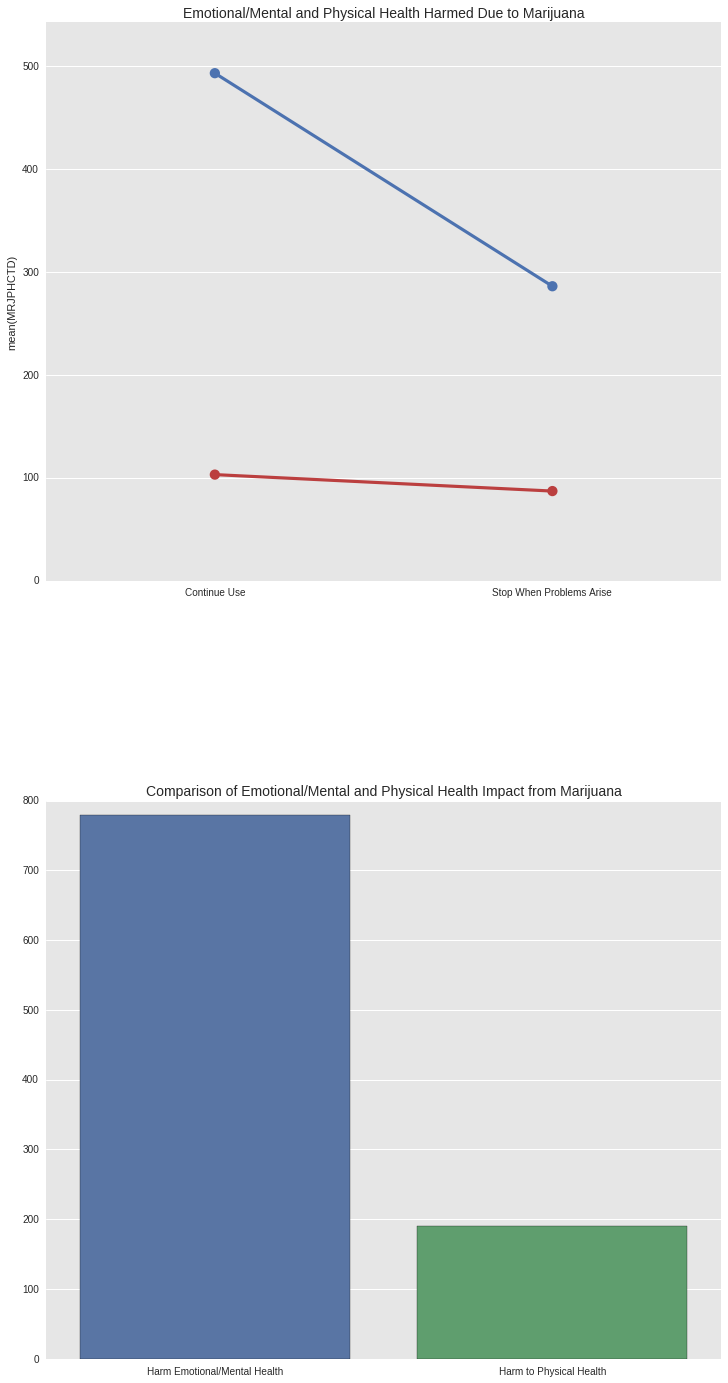

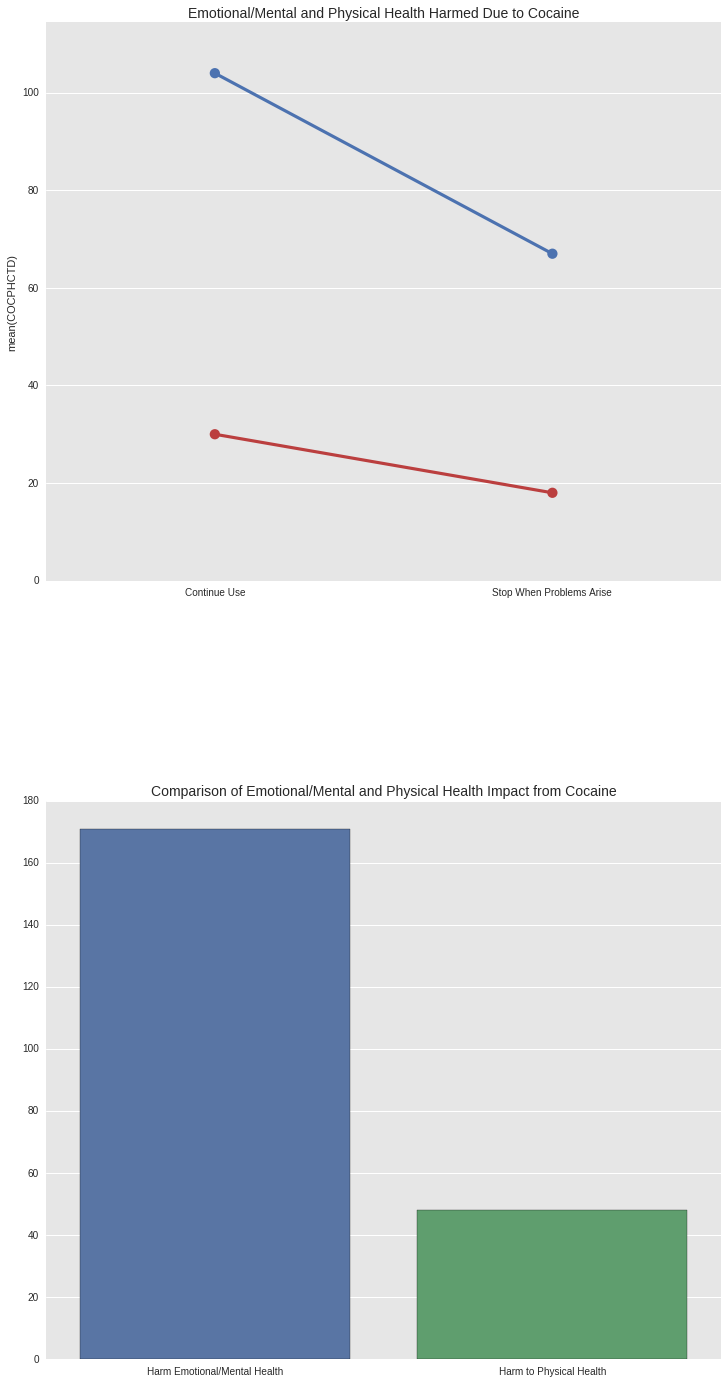

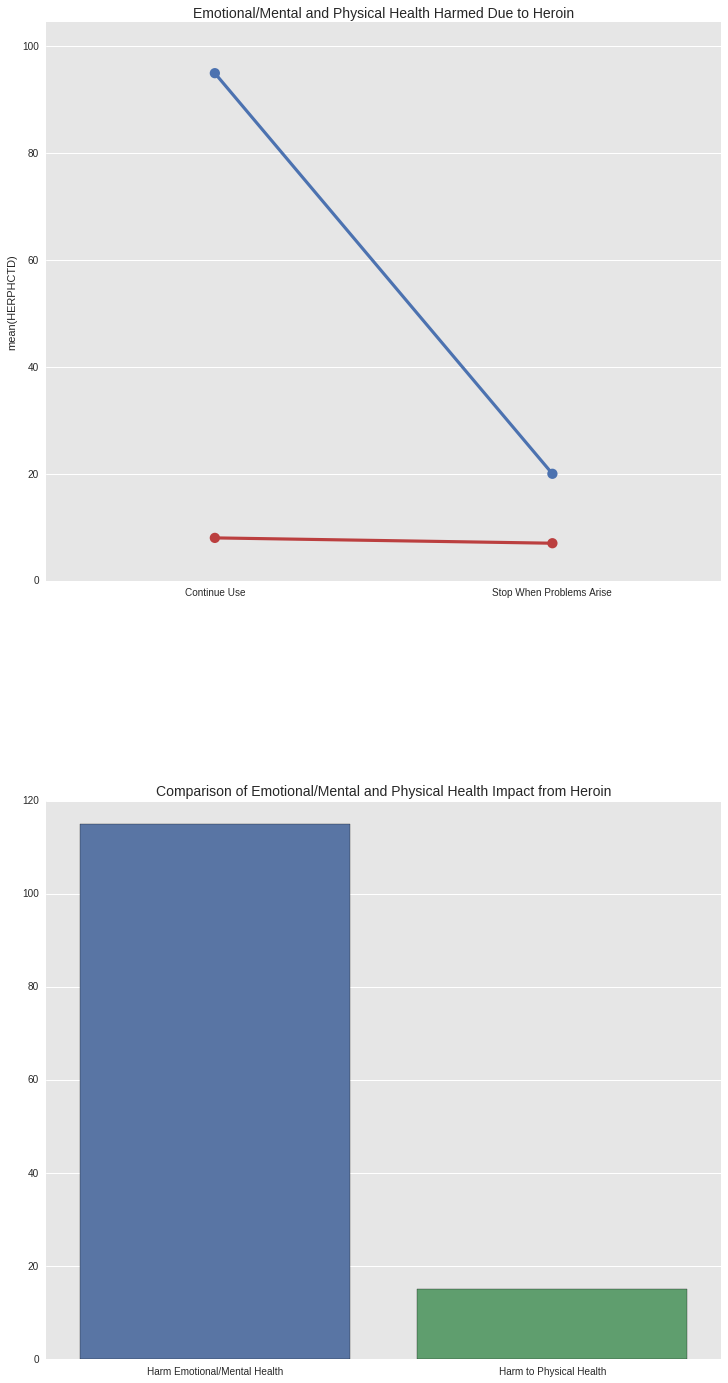

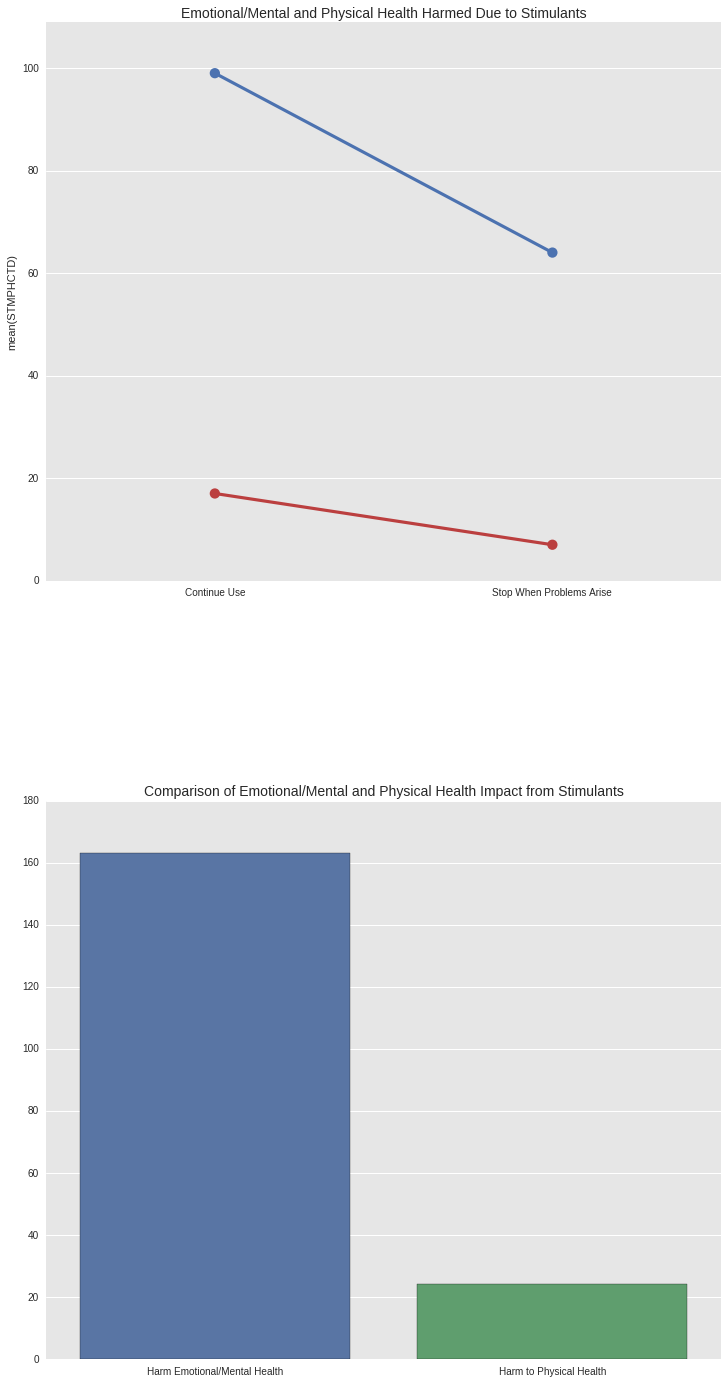

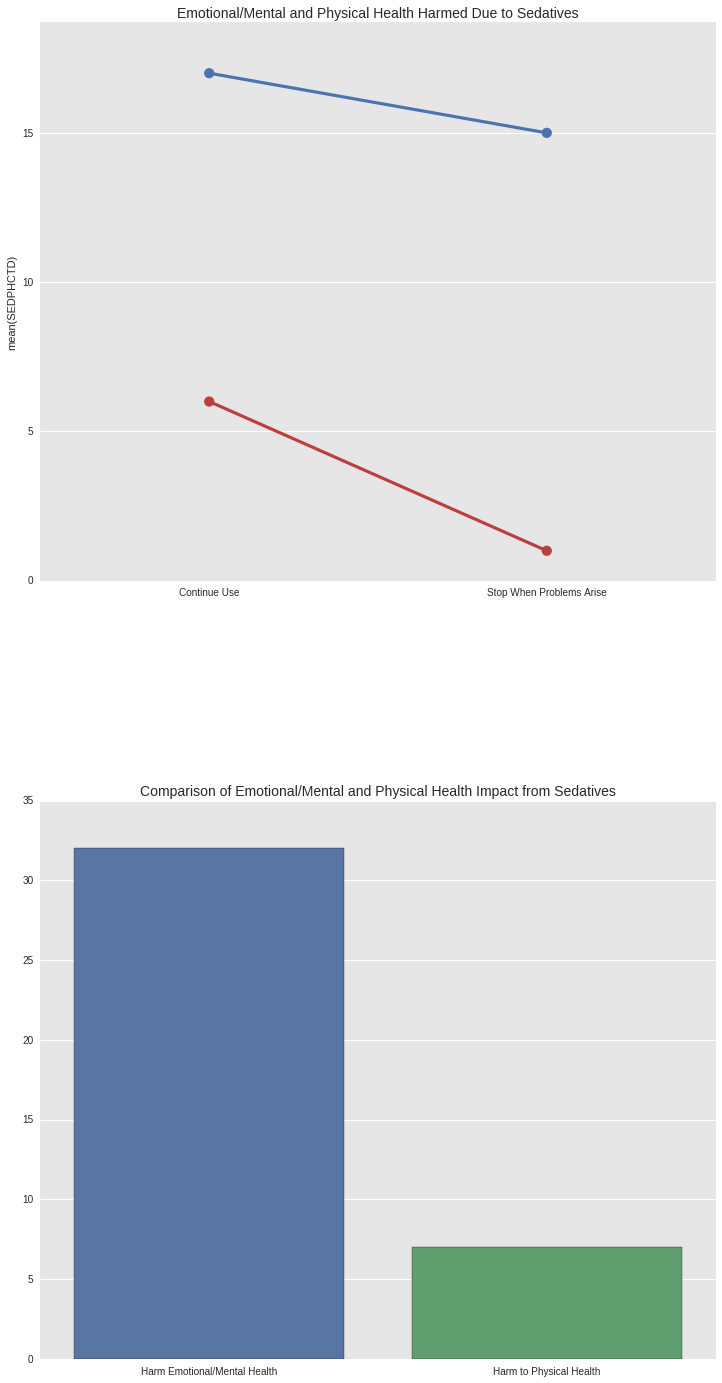

In [36]:
health_probs_substance(df, 'MRJEMOPB', 'MRJEMCTD', 'MRJPHLPB', 'MRJPHCTD', 'MJEVER', 'Marijuana')
health_probs_substance(df, 'COCEMOPB', 'COCEMCTD', 'COCPHLPB', 'COCPHCTD', 'COCEVER', 'Cocaine')
health_probs_substance(df, 'HEREMOPB', 'HEREMCTD', 'HERPHLPB', 'HERPHCTD', 'HEREVER', 'Heroin')
health_probs_substance(df, 'STMEMOPB', 'STMEMCTD', 'STMPHLPB', 'STMPHCTD', 'STMEVER', 'Stimulants')
health_probs_substance(df, 'SEDEMOPB', 'SEDEMCTD', 'SEDPHLPB', 'SEDPHCTD', 'SEDEVER', 'Sedatives')


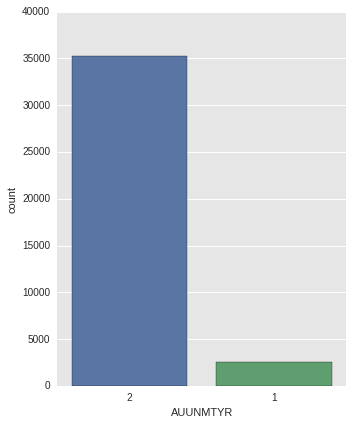

In [14]:
#df['AUUNMTYR']
df_needed_treatment_did_not_get = df[df['AUUNMTYR'] <3]
sns.factorplot('AUUNMTYR', data= df_needed_treatment_did_not_get, kind="count", size=6, aspect=.8)

In [15]:
print 
df_needed_treatment_did_not_get.AUUNMTYR.value_counts()


2    35221
1     2537
Name: AUUNMTYR, dtype: int64

In [16]:
## been arrested NOBOOKY2
 
df_arrested_past_year = df[df['NOBOOKY2'] < 4] 
df_arrested_past_year = df_arrested_past_year[df_arrested_past_year['NOBOOKY2']>0]

In [17]:
df_arrested_past_year.head()

,CASEID,QUESTID2,CIGEVER,CIGOFRSM,CIGWILYR,CIGTRY,CIGYFU,CIGMFU,CIGREC,CIG30USE,...,IIEMPSTY,II2EMSTY,EMPSTAT4,IIEMPST4,II2EMST4,PDEN00,COUTYP2,ANALWT_C,VESTR,VEREP
40,41,33238473,1,99,99,15,9999,99,1,30,...,1,1,4,1,1,1,1,7603.235958,30014,1
59,60,56318656,2,3,4,991,9991,91,91,91,...,9,9,99,9,9,1,1,2132.001085,30051,1
69,70,55745629,1,99,99,9,9999,99,2,93,...,1,1,2,1,1,2,3,264.785921,30001,1
79,80,47915758,2,4,4,991,9991,91,91,91,...,1,1,99,9,9,2,2,1043.781107,30055,2
149,150,93375337,1,99,99,16,9999,99,2,93,...,1,1,4,1,1,1,1,977.534863,30041,1


In [19]:

#Recieved tratment for addiction in prison/jail TXYRJAIL
#81 &91: Never had alcohol or drugs, 1: yes 2: no
df_arrested_past_year.loc[df['TXYRJAIL'] == 91, 'TXYRJAIL'] = 0 # never had alcohol or drugs
df_arrested_past_year.loc[df['TXYRJAIL'] == 81, 'TXYRJAIL'] = 0 # never had alcohol or drugs
df_arrested_past_year.loc[df['TXYRJAIL'] == 3, 'TXYRJAIL'] = 1 # logical yes
df_arrested_past_year.loc[df['TXYRJAIL'] == 5, 'TXYRJAIL'] = 1 # logical yes


df_treatment_in_prison = df_arrested_past_year[df_arrested_past_year['TXYRJAIL'] < 3]
df_treatment_in_prison = df_treatment_in_prison[df_treatment_in_prison['TXEVER'] < 3]
print df_treatment_in_prison['TXEVER'].value_counts()
print df_arrested_past_year['TXEVER'].value_counts()
print df['TXEVER'].value_counts()

1    341
Name: TXEVER, dtype: int64
2     1470
1      592
91     130
97       6
94       3
98       1
Name: TXEVER, dtype: int64
2     37404
91    14504
1      2917
98      319
97       64
81       31
94       27
85        2
Name: TXEVER, dtype: int64


In [20]:
#ax1.set_xticklabels(['NEVER used alcohol or drugs', 'Received Treatment in Prison', 'Did not Recieve Treatment in Prison'])
#sns.factorplot('TXEVER', data= df_treatment_in_prison, hue='TXYRJAIL',  kind="count", ax = ax1)


In [21]:
df_treatment = df
df_treatment.loc[df_treatment['TXEVER'] == 91, 'TXEVER'] = 0 # never had alcohol or drugs
df_treatment.loc[df_treatment['TXEVER'] == 81, 'TXEVER'] = 0 # never had alcohol or drugs

df_treatment = df_treatment[df_treatment['TXEVER']< 3]

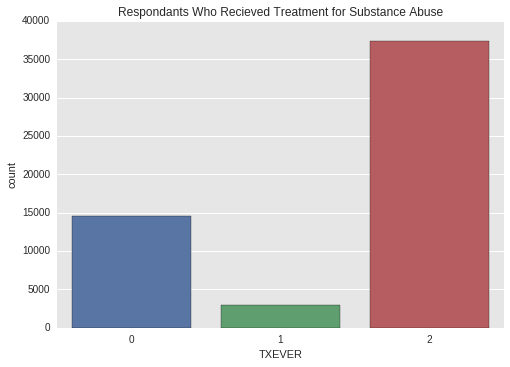

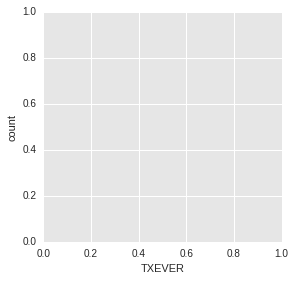

In [22]:
f, (ax1) = plt.subplots(1)
ax1.set_title('Respondants Who Recieved Treatment for Substance Abuse')
#ax1.set_xticklabels(['Never Used', 'Ever Treated', 'Never Treated'])
sns.factorplot('TXEVER', data = df_treatment, kind = 'count', ax= ax1, order=[0, 1, 2])

In [23]:
#NDTXNEDR Needed treatment past 12 mo
#TXYREVER Recieved treatment past 12 mo
#AUUNMTYR Sought Treatment didn't get it
 

In [37]:
df_never_treated = df_treatment[df_treatment['TXEVER']==2] 

In [95]:
df_needed_treatment12 = df[df['NDTXNEDR']==1]
needed_treatment = len(df[df['NDTXNEDR']==1]
didnt_need = len(df)

In [108]:
#needed_not_received = len(df_needed_treatment12[df_needed_treatment12['TXYREVER'] == 2].TXYREVER)
#needed_received = len(df_needed_treatment12[df_needed_treatment12['TXYREVER'] == 1].TXYREVER)
#sns.pointplot(x = [0, 1], y=[needed_received, needed_not_received])
#print needed_received
#print needed_not_received

In [44]:
df_didnt_get_needed_treatment = df_never_treated[df_never_treated['AUUNMTYR'] == 1]

In [55]:
def reason_no_treatment(df, cause, causestr):
    num_this_reason = float(len(df[df[cause]==1]))
    num_other_reason = float(len(df[df[cause]==6]))
    per_this_reason = num_this_reason/(num_this_reason + num_other_reason)
    per_other_reason = num_other_reason/(num_this_reason + num_other_reason)
    yvals = [per_this_reason, per_other_reason]
    titlestr = 'For How Many Was the Reason To Not Be Treated: ' + causestr + '?'
    plt.title(titlestr)
    plt.ylabel('% Of Respondants Who Didn\'t Get Needed Treatment')
    sns.barplot(x=[causestr, 'Other Reasons'], y=yvals)
    
    
    return

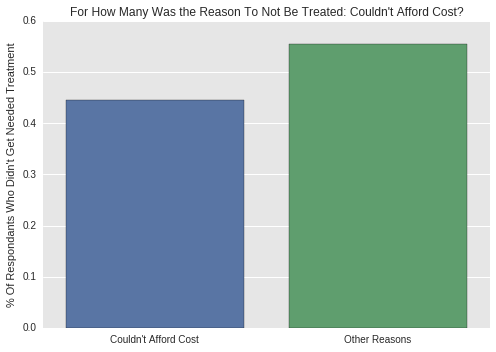

In [56]:
reason_no_treatment(df_didnt_get_needed_treatment, 'AUUNCOST', 'Couldn\'t Afford Cost')

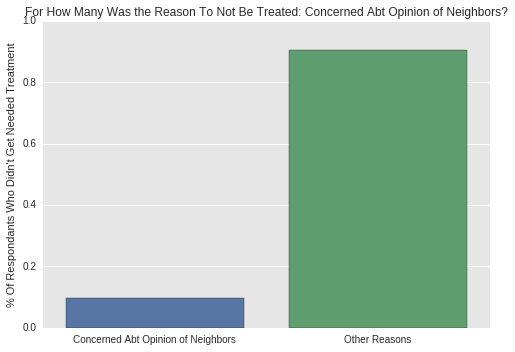

In [57]:
reason_no_treatment(df_didnt_get_needed_treatment, 'AUUNNBR', 'Concerned Abt Opinion of Neighbors')

### How common are various reasons to not get needed treatment?

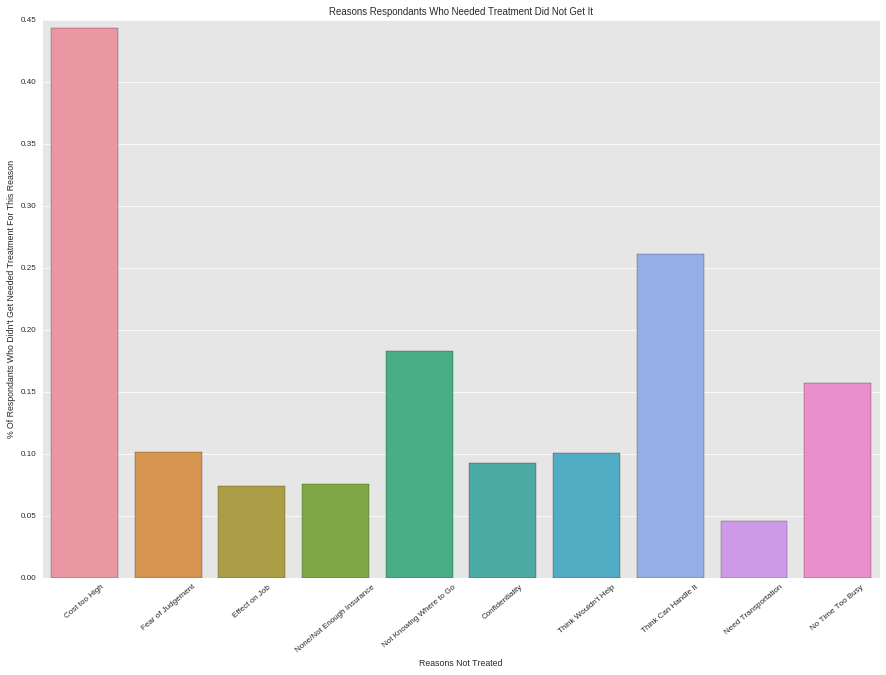

In [87]:
    num_cost = float(len(df[df['AUUNCOST']==1]))        #Couldn't afford cost
    num_judg = float(len(df[df['AUUNFOUT']==1]))        #fear of judgement from others finding out
    num_job = float(len(df[df['AUUNJOB']==1]))          #fear of impact on job
    num_insurance = float(len(df[df['AUUNENUF']==1]))   #not covered by insurance
    num_where = float(len(df[df['AUUNWHER']==1]))       #not knowing where to go
    num_confid = float(len(df[df['AUUNCFID']==1]))      #fear lack of confidentiality
    num_nohelp = float(len(df[df['AUUNNHLP']==1]))      #don't think it will help
    num_handle = float(len(df[df['AUUNHNDL']==1]))      #think they can handle it
    num_transport = float(len(df[df['AUUNNTSP']==1]))    #no transportation
    num_busy = float(len(df[df['AUUNBUSY']==1]))
    
    total = float(2510) #number of respondants for these questions
    
    perc_cost = float(num_cost)/total
    perc_judg = float(num_neighbors)/total
    perc_job = float(num_job)/total
    perc_insurance = float(num_insurance)/total
    perc_where = float(num_where)/total
    perc_confid = float(num_confid)/total
    perc_nohelp = float(num_nohelp)/total
    perc_handle = float(num_handle)/total
    perc_transport = float(num_transport)/total
    perc_busy = float(num_busy)/total                      
    
    
    yvals = [perc_cost, perc_judg, perc_job, perc_insurance, perc_where, perc_confid, perc_nohelp, perc_handle, perc_transport, perc_busy]
    xvals = ['Cost too High', 'Fear of Judgement', 'Effect on Job', 'None/Not Enough Insurance','Not Knowing Where to Go', 'Confidentiality', 'Think Wouldn\'t Help', 'Think Can Handle It', 'Need Transportation', 'No Time Too Busy']
    #titlestr = 'For How Many Was the Reason To Not Be Treated: ' + causestr + '?'
    #plt.title(titlestr)
    plt.figure(figsize=(15,10))
    plt.ylabel('% Of Respondants Who Didn\'t Get Needed Treatment For This Reason')
    plt.xlabel('Reasons Not Treated')
    plt.xticks(rotation=40)
    plt.title('Reasons Respondants Who Needed Treatment Did Not Get It')
    sns.barplot(x= xvals, y=yvals)
    
    

In [ ]:
#AUMOTVYR - How were you prompted to get treatment?

In [ ]:
#TXLTYOU2  - Results of Treatment
 

#### Outcomes of Treatment for Substance Abuse

In [110]:
df_treated = df[df['TXLTYOU2'] < 80]

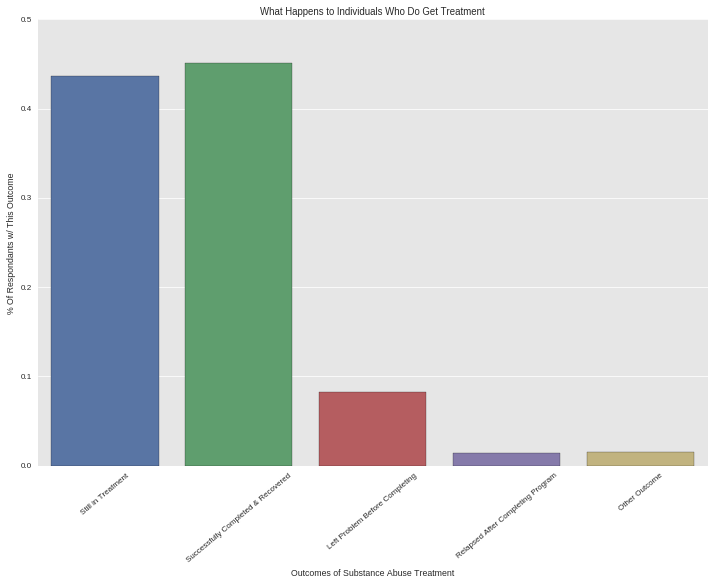

In [120]:
num_still = float(len(df_treated[df_treated['TXLTYOU2']==1]))     #still in treatment program
num_success = float(len(df_treated[df_treated['TXLTYOU2']==2]))     #successfully completed program
num_left = float(len(df_treated[df_treated['TXLTYOU2']==3]))        #left because problem with program
num_afford = float(len(df_treated[df_treated['TXLTYOU2']==4]))     #left because couldn't afford to continue
num_family = float(len(df_treated[df_treated['TXLTYOU2']==5]))     #left because of family
num_drugs = float(len(df_treated[df_treated['TXLTYOU2']==6]))   #left program to use drugs again
num_relapse = float(len(df_treated[df_treated['TXLTYOU2']>40]))  #relapsed or used drugs after finishing program
num_other = float(len(df_treated[df_treated['TXLTYOU2']==7]))   # other

total = 892 #respondants who answered these questions
perc_still = num_still/total
perc_success = num_success/total
perc_left = num_left/total
perc_afford = num_afford/total
perc_family = num_family/total
perc_drugs = num_drugs/total
perc_relapse = num_relapse/total
perc_other = num_other/total

yvals = [perc_still, perc_success, perc_left + perc_afford + perc_family + perc_drugs, perc_relapse, perc_other]
xvals = ['Still in Treatment', 'Successfully Completed & Recovered', 'Left Problem Before Completing', 'Relapsed After Completing Program', 'Other Outcome']


plt.figure(figsize=(12,8))
plt.ylabel('% Of Respondants w/ This Outcome')
plt.xlabel('Outcomes of Substance Abuse Treatment')
plt.xticks(rotation=40)
plt.title('What Happens to Individuals Who Do Get Treatment')
sns.barplot(x= xvals, y=yvals)

#### Lets look at only those who left and why

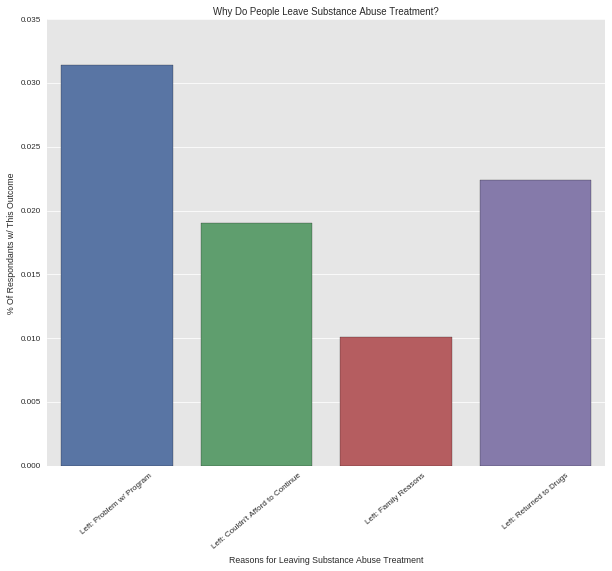

In [121]:

yvals = [ perc_left, perc_afford, perc_family, perc_drugs]
xvals = ['Left: Problem w/ Program', 'Left: Couldn\'t Afford to Continue', 'Left: Family Reasons', 'Left: Returned to Drugs']


plt.figure(figsize=(10,8))
plt.ylabel('% Of Respondants w/ This Outcome')
plt.xlabel('Reasons for Leaving Substance Abuse Treatment')
plt.xticks(rotation=40)
plt.title('Why Do People Leave Substance Abuse Treatment?')
sns.barplot(x= xvals, y=yvals)